In [3]:
import pandas as pd
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df_unfiltered = pd.read_csv('data/stations_data.csv')
territory_df = pd.read_excel('data/SDGE_territory.xlsx')
columns_to_keep = ['access_code', 'access_days_time', 'cards_accepted', 'expected_date', 'fuel_type_code', 'id','maximum_vehicle_class', 'open_date', 'owner_type_code',
'restricted_access', 'status_code', 'funding_sources', 'facility_type','station_name',
'latitude', 'longitude', 'city', 'country', 'intersection_directions','state', 'street_address', 'zip']
df = df_unfiltered[columns_to_keep]

#only keep stations in SDGE territory
sdge_df = df.merge(territory_df, left_on = 'zip', right_on = 'ZIP_CODE')

##### **Pie Chart Distribution of Station Fuel Type**

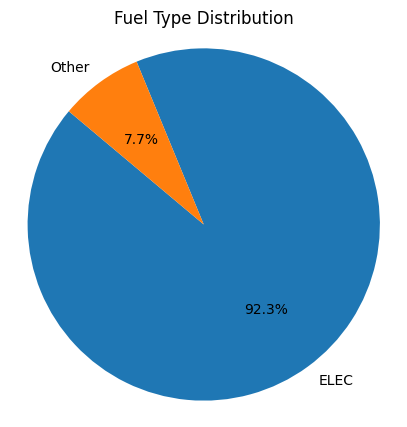

In [4]:
#PIE CHART distribution of fuel type
fuel_data = sdge_df['fuel_type_code'].value_counts()
labels = ['ELEC'] + ['Other']
size = [fuel_data[0]] + [sum(fuel_data[1:])]

plt.figure(figsize=(5, 5))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal') 
plt.show()

##### **Line Chart of Year versus Number of Alternative Fuel Stations Built**

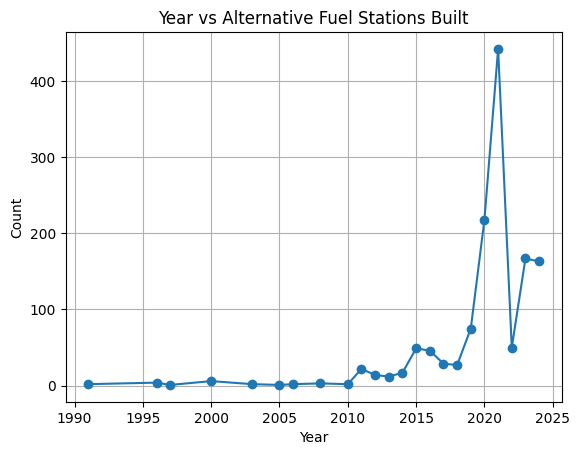

In [5]:
sdge_df['open_date'] = pd.to_datetime(sdge_df['open_date'])
sdge_df['year'] = sdge_df['open_date'].dt.year

years = list(sdge_df.groupby('year').count()['access_code'].index)
count = sdge_df.groupby('year').count()['access_code']
plt.plot(years, count, marker='o') 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year vs Alternative Fuel Stations Built')
plt.grid(True)  
plt.show()


##### **Bar Race Chart of cumulative number of Stations in Cities of Interest from 1991 to 2024**

In [6]:
#Only interested cities
cities = [
    "San Diego", 
    "Chula Vista", 
    "Escondido", 
    "Carlsbad", 
    "Oceanside", 
    "El Cajon", 
    "La Mesa", 
    "Santee", 
    "Encinitas", 
    "National City", 
    "Coronado", 
    "Poway", 
    "Vista", 
    "Solana Beach", 
    "Del Mar", 
    "San Marcos"
]

sd_df = df[(df['city'].isin(cities)) & (df['state'] == "CA")] 
sd_df['open_date'] = pd.to_datetime(sd_df['open_date'])
sd_df['year'] = sd_df['open_date'].dt.year

In [7]:
per_city_per_year = sd_df.groupby(['city', 'year']).size().unstack(fill_value=0)
time_series_data =  [['Year'] + list(per_city_per_year.columns)]
for city in cities:
    temp = per_city_per_year.loc[city].tolist()
    accumulated = list(accumulate(temp))
    time_series_data.append([city] + accumulated)

In [8]:
from IPython.core.display import display, HTML

with open('bar_race.html', 'r') as file:
    html_content = file.read()
    display(HTML(html_content))

Alternatively, view the bar_race chart at https://zzirving.github.io/CapstoneQ1/bar_race.html

##### **Geospatial Chart of Charger Locations, Shopping Centers, and Offices in San Diego**

In [11]:
import folium
from folium import Element

san_diego_coords = [32.7157, -117.1611]

charger_locations = list(zip(sd_df['latitude'],sd_df['longitude']))

shopping_centers = [
    ("Westfield UTC", 32.8728, -117.2116),
    ("Fashion Valley Mall", 32.7690, -117.1687),
    ("Seaport Village", 32.7106, -117.1707),
    ("Mission Valley Mall", 32.7679, -117.1545),
    ("Las Americas Premium Outlets", 32.5449, -117.0360),
    ("Horton Plaza Park", 32.7145, -117.1618),
    ("The Headquarters at Seaport", 32.7114, -117.1697),
    ("Liberty Station", 32.7391, -117.2160),
    ("Westfield Plaza Bonita", 32.6563, -117.0573),
    ("The Forum Carlsbad", 33.0747, -117.2626),
    ("Del Mar Highlands Town Center", 32.9476, -117.2415),
    ("Encinitas Ranch Town Center", 33.0530, -117.2790),
    ("The Shoppes at Carlsbad", 33.1845, -117.3148),
    ("Otay Ranch Town Center", 32.6256, -116.9644),
    ("Village at Pacific Highlands Ranch", 32.9702, -117.1798),
    ("Carmel Mountain Plaza", 32.9806, -117.0807),
    ("La Jolla Village Square", 32.8650, -117.2309),
    ("Grossmont Center", 32.7815, -117.0117),
    ("Hillcrest Uptown Shopping Center", 32.7487, -117.1653),
    ("Clairemont Town Square", 32.8297, -117.1983),
    ("La Mesa Springs Shopping Center", 32.7689, -117.0186),
    ("Torrey Hills Center", 32.9274, -117.2338),
    ("Village Walk at Eastlake", 32.6544, -116.9674),
    ("Santee Trolley Square", 32.8381, -116.9729),
    ("Carmel Country Plaza", 32.9439, -117.2234),
    ("Balboa Mesa Shopping Center", 32.8221, -117.1871),
    ("Rancho San Diego Towne Center", 32.7471, -116.9433),
    ("Bird Rock Coffee Roasters Plaza", 32.8220, -117.2782),
    ("Terra Nova Plaza", 32.6312, -117.0592),
    ("Hazard Center", 32.7676, -117.1557)
]

offices_companies = [
    ("Qualcomm", 32.8975, -117.1940),
    ("Illumina", 32.8791, -117.2074),
    ("Scripps Research", 32.8765, -117.2353),
    ("General Atomics", 32.8799, -117.1339),
    ("Northrop Grumman", 32.8351, -117.1226),
    ("Thermo Fisher Scientific", 32.8922, -117.2201),
    ("UC San Diego Health", 32.8726, -117.2389),
    ("Sharp HealthCare", 32.7912, -117.0995),
    ("San Diego Gas & Electric", 32.7067, -117.1549),
    ("Jack in the Box", 32.8222, -117.1541),
    ("Dexcom", 32.8916, -117.2026),
    ("Viasat", 33.1265, -117.2770),
    ("Becton Dickinson & Co.", 32.8842, -117.1995),
    ("Pfizer", 32.9016, -117.2320),
    ("Petco", 32.7104, -117.1589),
    ("Sony Electronics", 32.9852, -117.0814),
    ("ResMed", 32.8984, -117.2413),
    ("Mitchell International", 32.8457, -117.1716),
    ("Teradata", 32.9264, -117.2299),
    ("LPL Financial", 32.9495, -117.2411),
    ("ViaCyte", 32.8768, -117.2314),
    ("ServiceNow", 32.9009, -117.1929),
    ("Arena Pharmaceuticals", 32.8863, -117.2203),
    ("NuVasive", 32.8963, -117.1910),
    ("The Salk Institute", 32.8860, -117.2454),
    ("Biocom California", 32.8738, -117.2051),
    ("BlueNalu", 32.7317, -117.1850),
    ("Cubic Corporation", 32.8331, -117.1355),
    ("BioLegend", 32.8733, -117.1842),
    ("Rady Children's Hospital", 32.7890, -117.1542)
]

m = folium.Map(location=san_diego_coords, zoom_start=13)

for charger in charger_locations:
    folium.CircleMarker(
        location=charger,
        radius=2, 
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.8,
        popup='Charger'
    ).add_to(m)

for center in shopping_centers:
    folium.CircleMarker(
        location=(center[1], center[2]),
        radius=2,  
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup=center[0]
    ).add_to(m)

for office in offices_companies:
    folium.CircleMarker(
        location=(office[1], office[2]),
        radius=2,  
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.8,
        popup=office[0]
    ).add_to(m)

legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 120px; 
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
  <strong>Legend</strong><br>
  <i style="background: green; width: 10px; height: 10px; float: left; margin-right: 5px;"></i> Chargers<br>
  <i style="background: red; width: 10px; height: 10px; float: left; margin-right: 5px;"></i> Shopping Centers<br>
  <i style="background: black; width: 10px; height: 10px; float: left; margin-right: 5px;"></i> Offices<br>
</div>
"""

m.get_root().html.add_child(Element(legend_html))

m
